In [1]:
import os
import sys
sys.path.insert(0, os.path.relpath('../../../../..'))

from importlib import reload
from functools import partial
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from recidiviz.calculator.modeling.population_projection.super_simulation import SuperSimulation
from recidiviz.calculator.modeling.population_projection.incarceration_transitions import IncarceratedTransitions
from recidiviz.calculator.modeling.population_projection.release_transitions import ReleasedTransitions
from recidiviz.calculator.modeling.population_projection.spark_policy import SparkPolicy


../../../../../recidiviz/calculator/modeling/population_projection/super_simulation.py:92: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  def _convert_to_relative_date_from_timestamp(self, timestamp: pd.datetime):


In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
test = open('../state/VA/VA_prison_model_inputs.yaml')
test_sim = SuperSimulation(test)

/Users/justine/.local/share/virtualenvs/pulse-data-xK3VhzVV/lib/python3.7/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


initialization time:  33.84270000457764
simulation_time:  5.493014097213745
initialization time:  33.47336506843567
simulation_time:  5.468394994735718


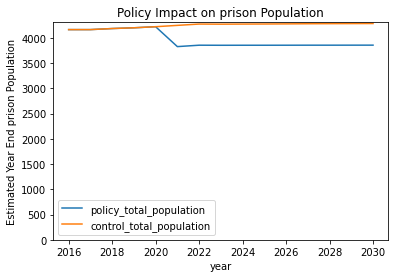

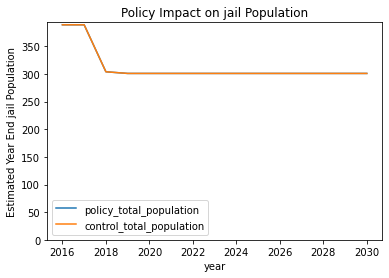

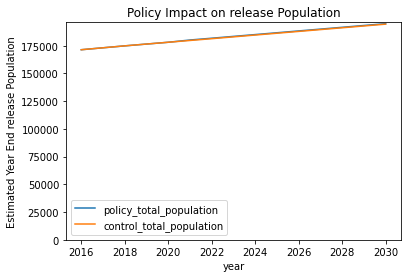

In [12]:
affected_crimes = {
    'ASL1342': 0.5, 
    'NAR3038': 3, 
    'NAR3087': 10, 
    'DWI5406': 1, 
    'DWI5449': 0.25, 
    'DWI5450': 0.5, 
    'LIC6834': 1, 
    'LIC6860': 1, 
#     'WPN5296': 5,   
#     'WPN5297': 2
}


# Policy Option Methods
def abolish_mm(mm, retroactive=False):
    return partial(IncarceratedTransitions.abolish_mandatory_minimum, 
                   current_mm=mm, 
                   outflow = 'release',
                   retroactive=retroactive)


policy_list_non_retroactive = [
    SparkPolicy(policy_fn=abolish_mm(affected_crimes[crime], retroactive=True),
                spark_compartment='prison',
                sub_population={'offense_code': crime},
                apply_retroactive=True)
    for crime in affected_crimes
]
    
test_results = test_sim.simulate_policy(policy_list_non_retroactive, 'prison')

In [14]:
simulation_tag = 'VA_SB_5046_non_violent_retroactive'
test_sim.upload_simulation_results_to_bq('recidiviz-staging', simulation_tag)

In [5]:
test_results

(      jail  release        prison
 year                             
 2016   0.0      0.0  0.000000e+00
 2017   0.0      0.0  0.000000e+00
 2018   0.0      0.0  0.000000e+00
 2019   0.0      0.0  0.000000e+00
 2020   0.0      0.0  0.000000e+00
 2021   0.0      0.0  0.000000e+00
 2022   0.0     -0.0  1.315663e+07
 2023   0.0     -0.0  3.163027e+07
 2024   0.0     -0.0  5.424741e+07
 2025   0.0     -0.0  8.023826e+07,
       jail      release       prison
 year                                
 2016   0.0     0.000000     0.000000
 2017   0.0     0.000000     0.000000
 2018   0.0     0.000000     0.000000
 2019   0.0     0.000000     0.000000
 2020   0.0     0.000000     0.000000
 2021   0.0     0.000000     0.000000
 2022   0.0  -409.277499   409.277498
 2023   0.0  -983.956718   983.956715
 2024   0.0 -1687.532192  1687.532187
 2025   0.0 -2496.057356  2496.057350)

In [6]:
test_sim.output_data['life_years']

,jail,release,prison
year,,,
2016,0.0,0.000000,0.000000
2017,0.0,0.000000,0.000000
2018,0.0,0.000000,0.000000
2019,0.0,0.000000,0.000000
2020,0.0,0.000000,0.000000
2021,0.0,0.000000,0.000000
2022,0.0,-409.277499,409.277498
2023,0.0,-983.956718,983.956715
2024,0.0,-1687.532192,1687.532187


In [7]:
test_sim.output_data['cost_avoidance']

,jail,release,prison
year,,,
2016,0.0,0.0,0.000000e+00
2017,0.0,0.0,0.000000e+00
2018,0.0,0.0,0.000000e+00
2019,0.0,0.0,0.000000e+00
2020,0.0,0.0,0.000000e+00
2021,0.0,0.0,0.000000e+00
2022,0.0,-0.0,1.315663e+07
2023,0.0,-0.0,3.163027e+07
2024,0.0,-0.0,5.424741e+07
